In [22]:
!pip install pandas
!pip install numpy 
!pip install scikit-learn 
!pip install tensorflow 
!pip install keras 
!pip install matplotlib


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [24]:
data = pd.read_csv('D:\Documents\INTERNSHIP\TESLA.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Hp 446\AppData\Local\Temp\ipykernel_3440\75421317.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\Documents\INTERNSHIP\TESLA.csv')


In [25]:
data = data.dropna()  # Drop missing values
features = data.drop(['Date', 'Close'], axis=1)  # Exclude date and target variable
target = data['Close']

In [26]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [28]:
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)
y_pred_nn = nn_model.predict(X_test)


c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1544
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010     
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0575e-04 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7941e-04 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8849e-04 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5110e-04 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9175e-04 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5608e-04 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6434e-04 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2163e-04 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3995e-04 
Epoch 15/100
13/13

In [29]:
y_test_actual = scaler.inverse_transform(y_test)
y_pred_lr_actual = scaler.inverse_transform(y_pred_lr)
y_pred_nn_actual = scaler.inverse_transform(y_pred_nn)


In [30]:
rmse_lr = np.sqrt(mean_squared_error(y_test_actual, y_pred_lr_actual))
rmse_nn = np.sqrt(mean_squared_error(y_test_actual, y_pred_nn_actual))

print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Neural Network RMSE: {rmse_nn}')

Linear Regression RMSE: 7.737684310652328e-14
Neural Network RMSE: 0.6680692982597255


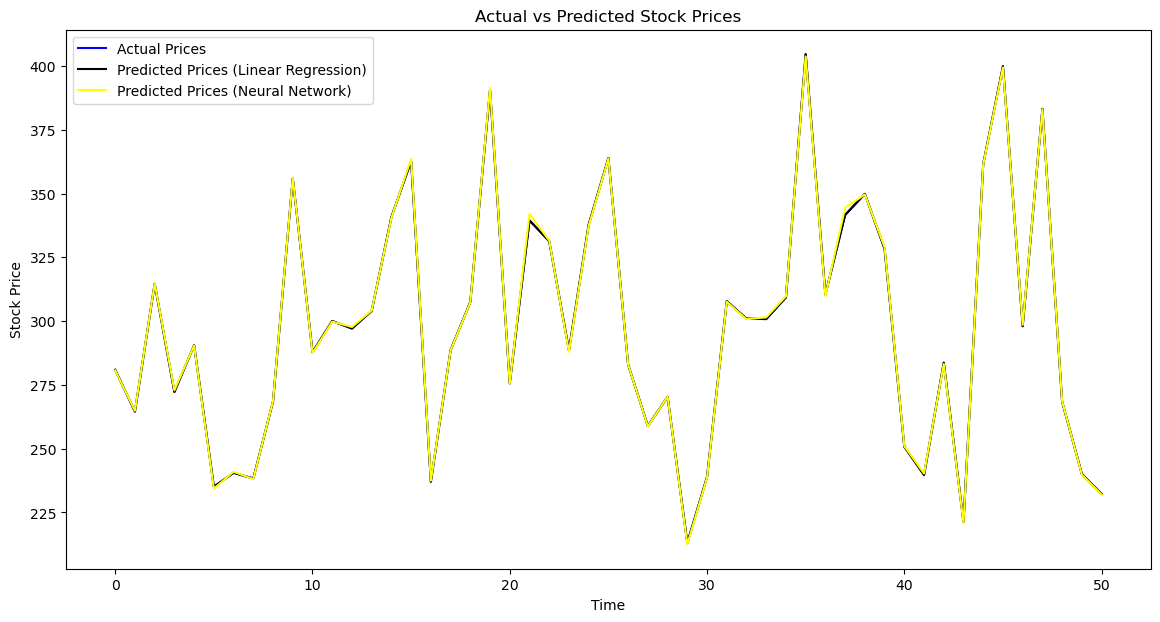

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Prices', color='blue')  # Actual prices in blue
plt.plot(y_pred_lr_actual, label='Predicted Prices (Linear Regression)', color='black')  # Linear Regression predictions in red
plt.plot(y_pred_nn_actual, label='Predicted Prices (Neural Network)', color='yellow')  # Neural Network predictions in orange
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()